# **Flipkart Reviews Analysis**

In the fast-paced digital landscape, Flipkart stands as a prominent e-commerce giant in India, rivalling competitors like Snapdeal, Myntra, Nykaa, and IndiaMART. As society embraces digitization, the e-commerce sector experiences exponential growth, catering to consumers with unparalleled convenience and accessibility.

Understanding customer sentiment through product reviews is pivotal for e-commerce platforms like Flipkart. By employing sentiment analysis techniques, these platforms gain invaluable insights into product performance and customer satisfaction levels. This analysis not only aids in enhancing existing products and services but also guides future product development strategies.

Sentiment analysis entails the contextual examination of textual data to discern subjective information, thereby unraveling the sentiments expressed towards a brand, product, or service. By actively monitoring online conversations, e-commerce companies can gauge the social sentiment surrounding their offerings, enabling them to adapt and cater to evolving consumer preferences effectively.

In [ ]:
# importing library
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re
from nltk.corpus import stopwords
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Pandas:** data processing for CSV files (for example: pd.read_csv)

**Seaborn:**  visualizing statistical plots

**Matplotlib:** plotting graphs

**NLTK:** Natural Language Processing Toolkit library for NLP task

**WordCloud:**  used for text data visualization. Bigger font means that a particular word is frequently used.

**A regular expression (re):** RegEx, used for pattern matching to better understand the product reviews.

**nltk sentiment Vader:** for sentiment analysis purposes, sensitive to polarity (positive, negative, and neutral) and intensity (emotion strength).

In [ ]:
#reading csv file
try:
    df = pd.read_csv('/content/Nylon Shuttle.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [ ]:
df.head()

,Reviewer_Name,Review_Title,Place_of_Review,Up_Votes,Down_Votes,Month,Review_text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


# **Data Preprocessing**


**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
It makes data consistent. When collecting data, it’s possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
It increases the data’s algorithm readability. Preprocessing enhances the data’s quality and makes it easier for machine learning algorithms to read, use, and interpret it.

In [ ]:
#The df.shape method shows the shape of the dataset.

print ('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 8518 rows and 8 columns


In [ ]:
#The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer_Name    8508 non-null   object 
 1   Review_Title     8508 non-null   object 
 2   Place_of_Review  8468 non-null   object 
 3   Up_Votes         8508 non-null   float64
 4   Down_Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review_text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
#df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis),but may also be used with a boolean array.
# The iloc property gets, or sets, the value(s) of the specified indexes.

df.iloc[1]

Reviewer_Name                                      Flipkart Customer
Review_Title                                  Don't waste your money
Place_of_Review                           Certified Buyer, Hyderabad
Up_Votes                                                       109.0
Down_Votes                                                       6.0
Month                                                         Feb-21
Review_text        They didn't supplied Yonex Mavis 350. Outside ...
Ratings                                                            1
Name: 1, dtype: object

In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)


int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)



Total number of categorical columns are  5
There names are as follows:  ['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Month', 'Review_text']
Total number of numerical columns are  1
There names are as follows:  ['Ratings']
Total number of float64 columns are  2
There name are as follow:  ['Up_Votes', 'Down_Votes']



**Observation :**

We have total 2 features where 1 is object type and other is integer type.

# **Descriptive Analysis**

In [ ]:
# The df.describe() method returns description of the data in the DataFrame.
df.describe()

,Up_Votes,Down_Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [ ]:
df.isnull().sum()

# A null value in a relational database is used when the value in a column is unknown or missing.

Reviewer_Name       10
Review_Title        10
Place_of_Review     50
Up_Votes            10
Down_Votes          10
Month              465
Review_text          8
Ratings              0
dtype: int64

In [ ]:
df.isnull().sum()

# A null value in a relational database is used when the value in a column is unknown or missing.

Reviewer_Name       10
Review_Title        10
Place_of_Review     50
Up_Votes            10
Down_Votes          10
Month              465
Review_text          8
Ratings              0
dtype: int64

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [ ]:
print(df.columns)

Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


<Axes: xlabel='Ratings', ylabel='count'>

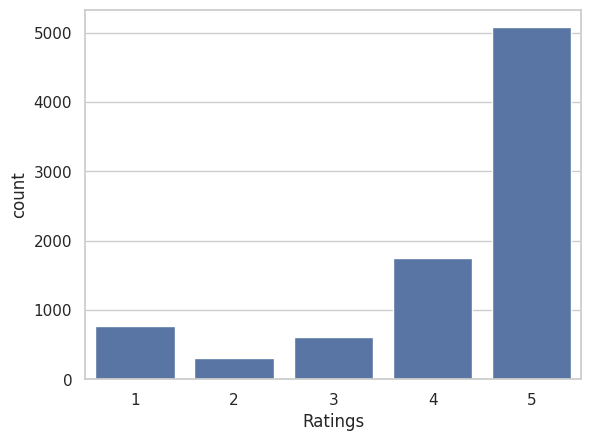

In [ ]:
sns.countplot(x = df['Ratings'])

# **Feature Selection**

To prepare the data for the machine learning algorithm to classify user reviews as positive, Neutral (or) negative

we will follow these steps:

1.   Create a new feature called 'Class' based on the 'Ratings' column to serve as the target variable for the ML model.

2.   Create a new DataFrame containing only the relevant columns: 'Review Text' and 'Class'.


3.  Drop the small number of null values observed in the 'Review Text' column to prevent potential bias in the ML algorithm.






In [ ]:
# Creating  a new feature called Class
def classify_sentiment(rating):
    if rating <= 2:
        return 'Neg'
    elif rating == 3:
        return 'Neu'
    else:
        return 'Pos'

df['Class'] = df['Ratings'].apply(classify_sentiment)


In [ ]:
df.head()

,Reviewer_Name,Review_Title,Place_of_Review,Up_Votes,Down_Votes,Month,Review_text,Ratings,Class
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4,Pos
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1,Neg
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1,Neg
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Neu
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Neg


In [ ]:
# Create new DataFrame with relevant columns
relevant_columns = ['Review_text', 'Class']
relevant_data = df[relevant_columns]
relevant_data

,Review_text,Class
0,"Nice product, good quality, but price is now r...",Pos
1,They didn't supplied Yonex Mavis 350. Outside ...,Neg
2,Worst product. Damaged shuttlecocks packed in ...,Neg
3,"Quite O. K. , but nowadays the quality of the...",Neu
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Neg
...,...,...
8513,NaN,Pos
8514,NaN,Neg
8515,NaN,Pos
8516,NaN,Neg


In [ ]:
# Drop null values in 'Review Text' column

relevant_data = relevant_data.dropna(subset=['Review_text'])
relevant_data['Review_text'].head(5)

0    Nice product, good quality, but price is now r...
1    They didn't supplied Yonex Mavis 350. Outside ...
2    Worst product. Damaged shuttlecocks packed in ...
3    Quite O. K. , but nowadays  the quality of the...
4    Over pricedJust â?¹620 ..from retailer.I didn'...
Name: Review_text, dtype: object

In [ ]:
# Calculate the value counts of Ratings column
ratings = df["Ratings"].value_counts()

# Extract ratings and their corresponding quantities
numbers = ratings.index
quantity = ratings.values

In [ ]:
# Create a pie chart using Plotly
figure = px.pie(names=numbers, values=quantity, hole=0.5)
figure.show()

The pie chart provides a visual representation of the distribution of ratings in the dataset.

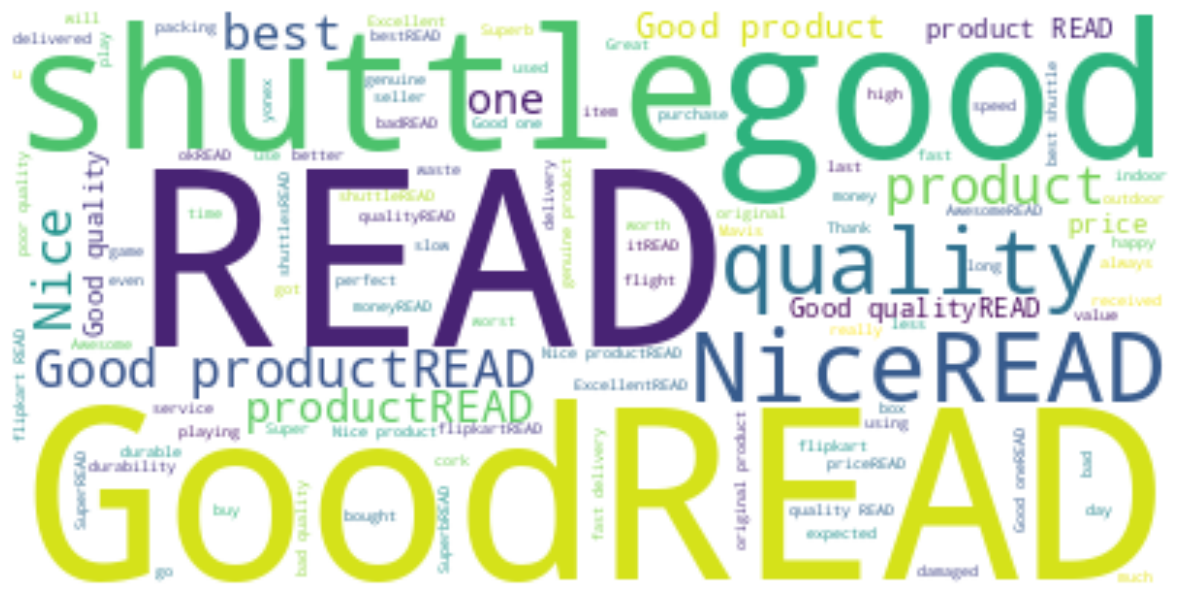

In [ ]:
text = " ".join(str(i) for i in df.Review_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Distribution of Target Variable:
Pos    0.801763
Neg    0.125969
Neu    0.072268
Name: Class, dtype: float64


<ipython-input-87-5b529ae5f615>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




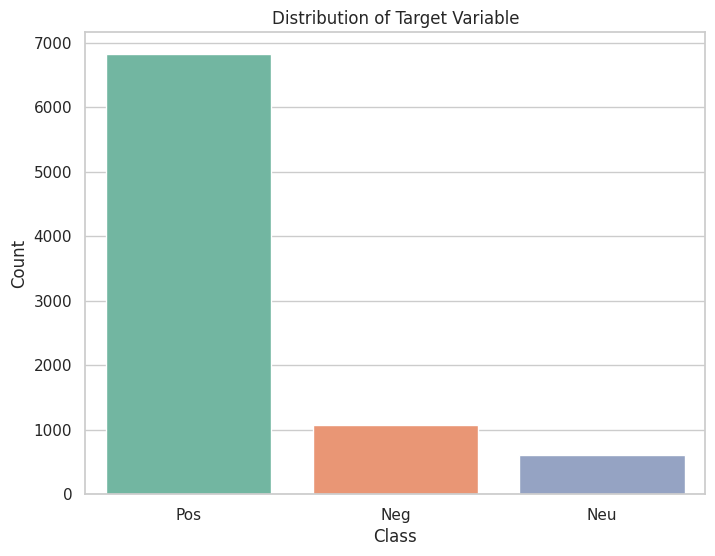

In [ ]:
print("Distribution of Target Variable:")
print(relevant_data['Class'].value_counts(normalize=True))

# Plot the distribution using seaborn countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=relevant_data, palette="Set2")
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

The code snippet displays the distribution of sentiment labels ('Positive' and 'Negative' and 'Neutral') in the dataset. The countplot visualization showcases the relative frequency of each sentiment class, with aesthetics enhanced for readability and interpretation. This insight aids decision-making processes related to modeling strategies and business initiatives aimed at improving customer satisfaction.

# **Training the model**


**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
'''
# Splitting data into features (X) and target variable (y)
X = relevant_data['Review_text']
y = relevant_data['Class']

# Splitting data into training and testing sets (80% train, 20% test)
X_t'''rain, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Assuming a maximum of 1000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
'''

Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

F1_score :
The F1 score is a machine learning metric that can be used in classification models.

Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [ ]:
'''
# Initializing and training the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Predicting on the testing set
y_pred = logistic_regression.predict(X_test_tfidf)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
'''

Accuracy: 0.8707403055229143

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.61      0.65       216
     Neutral       0.69      0.07      0.13       121
    Positive       0.89      0.98      0.94      1365

    accuracy                           0.87      1702
   macro avg       0.76      0.56      0.57      1702
weighted avg       0.85      0.87      0.84      1702



# **VADER's Algorithm**

In sentiment analysis, our focus is primarily on two aspects:

polarity classification and document-level sentiment.Rather than discerning objectivity or subjectivity, we aim to categorize text as expressing positive, negative, or neutral opinions.

Additionally, we aggregate sentiments across entire documents or paragraphs to derive an overall opinion, without delving into fine-grained analysis of positivity or negativity.

Our goal is to determine whether a review is positive or negative, rather than quantifying the degree of sentiment expresse

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
# Here we are creating a new column scores based on the polarity scores.
relevant_data['scores'] = relevant_data['Review_text'].apply(lambda review: sid.polarity_scores(review))

<ipython-input-90-5a7f25aa03e6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

#Here we are creating a new column compound which will store all the compound score of polarity score.
relevant_data['compound']  = relevant_data['scores'].apply(lambda score_dict: score_dict['compound'])

<ipython-input-91-6615e79f8651>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#This column will compute the result on the basis of compound score.
relevant_data['comp_score'] = relevant_data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

<ipython-input-92-fd28e48de607>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

relevant_data.head()

,Review_text,Class,scores,compound,comp_score
0,"Nice product, good quality, but price is now r...",Pos,"{'neg': 0.09, 'neu': 0.547, 'pos': 0.364, 'com...",0.9267,pos
1,They didn't supplied Yonex Mavis 350. Outside ...,Neg,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767,neg
2,Worst product. Damaged shuttlecocks packed in ...,Neg,"{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'comp...",-0.9146,neg
3,"Quite O. K. , but nowadays the quality of the...",Neu,"{'neg': 0.021, 'neu': 0.768, 'pos': 0.21, 'com...",0.9566,pos
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Neg,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.2500,pos


In [ ]:
from sklearn.model_selection import KFold

# Define kfold with 10 splits
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:

# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix

print("Accuracy using VADER algorithm:-")
print(accuracy_score(relevant_data['Class'],relevant_data['comp_score']))

print(classification_report(relevant_data['Class'],relevant_data['comp_score'],zero_division=1))

cm = confusion_matrix(relevant_data['Class'],relevant_data['comp_score'])
print(cm)

Accuracy using VADER algorithm:-
0.0
              precision    recall  f1-score   support

         Neg       1.00      0.00      0.00    1072.0
         Neu       1.00      0.00      0.00     615.0
         Pos       1.00      0.00      0.00    6823.0
         neg       0.00      1.00      0.00       0.0
         pos       0.00      1.00      0.00       0.0

    accuracy                           0.00    8510.0
   macro avg       0.60      0.40      0.00    8510.0
weighted avg       1.00      0.00      0.00    8510.0

[[   0    0    0  569  503]
 [   0    0    0  111  504]
 [   0    0    0  117 6706]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


<Axes: >

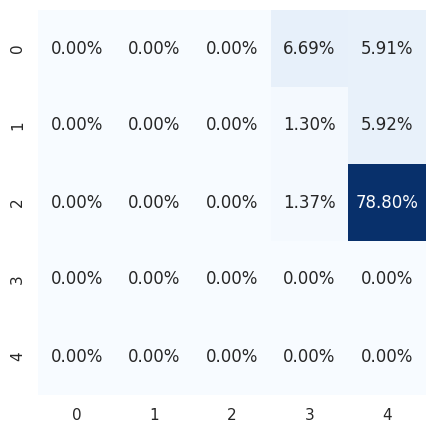

In [ ]:
import numpy as np
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar = False)

In [ ]:
import pickle
pickle.dump(sid , open('FlipkartReview.pkl', 'wb'))


In [ ]:
import pickle

def model_prediction(features):
    sid = SentimentIntensityAnalyzer()
    pickled_model = pickle.load(open('FlipkartReview.pkl', 'rb'))
    Review = sid.polarity_scores(features)
    if Review['compound']>0:
        return "Review is Positive"
    elif Review['compound']<0:
        return "Review is Negative"
    else:
        return "review is Neutral"

In [ ]:
comment = "Worst Product"

In [ ]:
model_prediction(comment)

'Review is Negative'